In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools

%matplotlib inline

In [155]:
df = pd.read_csv("car_data.csv")

In [156]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [157]:
df.head(3)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [158]:
regr1 = linear_model.LinearRegression()
regr1.fit(df[['Mileage']],df[['Price']])
print("The x coefficient = {}".format(regr1.coef_))
print("  The y intercept = {}".format(regr1.intercept_))

print("\n          The Rsq = {}".format(regr1.score(df[['Mileage']],df[['Price']])))

The x coefficient = [[-0.1725205]]
  The y intercept = [ 24764.55900606]

          The Rsq = 0.02046344732348948


In [159]:
df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


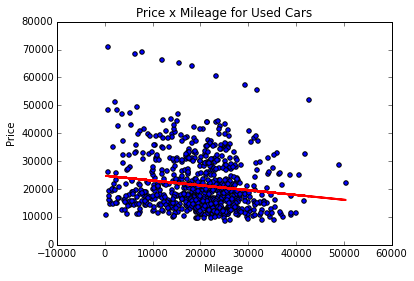

In [160]:
plt.scatter(df.Mileage,df.Price)
plt.ylabel("Price")
plt.xlabel("Mileage")
plt.title("Price x Mileage for Used Cars")
plt.plot(df[['Mileage']],
         regr1.predict(df[['Mileage']]), 
         color='red', 
         linewidth = 2)

In [161]:
fulldf = df[['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors','Cruise','Sound','Leather']]

input = fulldf[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
output = fulldf['Price']

regrm = linear_model.LinearRegression()
regrm.fit(input, output)
print("Coefficients for Mileage, Cylinder, Liter, Doors, Cruise, Sound, leather:")
print(regrm.coef_)
print("Y-intercept = {}".format(regrm.intercept_))
print("    The Rsq = {}".format(regrm.score(input, output)))

Coefficients for Mileage, Cylinder, Liter, Doors, Cruise, Sound, leather:
[ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03]
Y-intercept = 6758.755143598082
    The Rsq = 0.4462643536728379


In [89]:
fulldf.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [162]:
subdf = df[['Mileage','Price','Cylinder','Cruise']]   #Based on the highest correlation with Price.

input = fulldf[['Mileage','Cylinder','Cruise']]
output = fulldf['Price']

regrm = linear_model.LinearRegression()
regrm.fit(input, output)
print("Coefficients for Mileage, Cylinder + Cruise:")
print(regrm.coef_)
print("Y-intercept = {}".format(regrm.intercept_))
print("    The Rsq = {}".format(regrm.score(input, output)))

Coefficients for Mileage, Cylinder + Cruise:
[ -1.63893582e-01   3.35015021e+03   6.12655561e+03]
Y-intercept = 2332.522210792529
    The Rsq = 0.4023745860316019


In [163]:
import itertools

In [165]:
fulldf = pd.read_csv("car_data.csv")

In [171]:
#fulldf = pd.read_csv("car_data.csv")
possible_columns = ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']

'''
combos=[] 
   - the range "1" allows control of the minimum number of columns to be included.
   - The 'intertools' appears to create a list of tuples for each combination of columns.
   - Each tuple needs to be unpacked to a list prior to evaluation by LinearRegression. 
'''
combos=[]
for x in range(1, len(possible_columns)):        
    combos.append(list(itertools.combinations(possible_columns, x)))

'''
letter=[]
   - Each tuple from 'combo' is unpacked to a list and appended into letter.
'''   
letter =[]
for x in combos:                                
    for y in x:
        letter.append(list(y))

'''
results=[]
   - The list of column names are plugged into df[x] as input_data for regression.
   - After each loop through the list of lists:
       o The 'results' list accummulates two columns: 'Grouping' and 'Score'.
       o The list of column names are 'join'd and appended into 'Grouping'.
       o The Rsq is recorded as 'Score' in the DataFrame.
   - The table is sorted high to low and 5 top printed.
   
'''
results=[]
output = df['Price']

for x in letter:
    input_data = df[x]

    regrm = linear_model.LinearRegression()
    regrm.fit(input_data, output)
    regrm.coef_
    regrm.intercept_
    
    results.append([', '.join(x),regrm.score(input_data, output)])
    
results = pd.DataFrame(results, columns=('Grouping', 'Score'))
results.sort_index(by='Score', ascending=False).head(5)

# print("Oddly, cannot discover why the initial 7 column Rsq (including 'liter) = higher than max in table!!")
# print("Rsq all 7 = 0.44626")

,Grouping,Score
123,"Mileage, Cylinder, Doors, Cruise, Sound, Leather",0.445691
120,"Mileage, Cylinder, Liter, Doors, Cruise, Leather",0.437806
105,"Mileage, Cylinder, Doors, Cruise, Leather",0.436940
122,"Mileage, Cylinder, Liter, Cruise, Sound, Leather",0.430141
107,"Mileage, Cylinder, Cruise, Sound, Leather",0.430018


In [167]:
len(possible_columns)

7

In [121]:
testdf = df

exp_list = ['Make']

for x in exp_list:
    for el in testdf['Make'].unique():
        df[str(el)] = testdf['Make'] == el


In [122]:
testdf.head(3)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,Cadillac,Chevrolet,Pontiac,SAAB,Saturn,Sedan,Convertible,Hatchback,Coupe,Wagon
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,False,False,False,False,False,True,False,False,False,False
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,False,False,False,False,False,True,False,False,False,False
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,False,False,False,False,False,True,False,False,False,False
